<a href="https://colab.research.google.com/github/Gayatri-Surapaneni/Zomato-restaurant-clustering-and-sentiment-analysis/blob/main/Gayatri_zomato_restaurant_claustering_and_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from numpy import math,unique

from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df= pd.read_csv('/content/drive/MyDrive/Zomato Restaurant names and Metadata.csv')

In [4]:
df.head(5)

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [5]:
reviews = pd.read_csv('/content/drive/MyDrive/Zomato Restaurant reviews.csv')

In [6]:
reviews.head(5)

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [8]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


In [9]:
df.shape

(105, 6)

In [10]:
reviews.shape

(10000, 7)

In [11]:
df.columns

Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')

In [12]:
reviews.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')

In [13]:
df.nunique()

Name           105
Links          105
Cost            29
Collections     42
Cuisines        92
Timings         77
dtype: int64

In [14]:
reviews.nunique()

Restaurant     100
Reviewer      7446
Review        9364
Rating          10
Metadata      2477
Time          9782
Pictures        36
dtype: int64

In [15]:
df.drop(['Links', 'Timings'], axis=1, inplace=True)

In [16]:
df.head(2)

,Name,Cost,Collections,Cuisines
0,Beyond Flavours,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I..."
1,Paradise,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese"


In [17]:
#Here we had cost column with numbers seperated by commas. So we are trying to remove comma which ever is present in Cost column.
#Then we convert Cost column to float
df['Cost'] = df['Cost'].str.replace(",","").astype('float')

In [18]:
df.head(5)

,Name,Cost,Collections,Cuisines
0,Beyond Flavours,800.0,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I..."
1,Paradise,800.0,Hyderabad's Hottest,"Biryani, North Indian, Chinese"
2,Flechazo,1300.0,"Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts"
3,Shah Ghouse Hotel & Restaurant,800.0,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever..."
4,Over The Moon Brew Company,1200.0,"Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med..."


In [67]:
#Renaming the Name as restuarant as same as Reviews dataframe.
df.rename(columns={'Name':'Restaurant'},inplace=True)
     

In [68]:
df.head(2)

,Restaurant,Cost,Collections,Cuisines,Collections_length,Total Cuisines
0,Beyond Flavours,800.0,food hygien rate restaur hyderabad corpor favo...,"Chinese, Continental, Kebab, European, South I...",15,6
1,Paradise,800.0,hyderabad hottest,"Biryani, North Indian, Chinese",2,3


In [19]:
reviews = reviews[reviews['Rating']!= 'Like']
#We have only string type present ('Like') in Rating column of reviews_df. So we drop it.

In [20]:
reviews['Rating']= reviews['Rating'].astype('float64')
#we convert rating column into float

In [70]:
#Converting Time column to DateTime
import datetime
reviews['Time'] = pd.to_datetime(reviews['Time'])

KeyError: ignored

In [21]:
reviews.head(5)

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [22]:
df.isna().sum()
#missing values


Name            0
Cost            0
Collections    54
Cuisines        0
dtype: int64

In [23]:
reviews.isna().sum()


Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

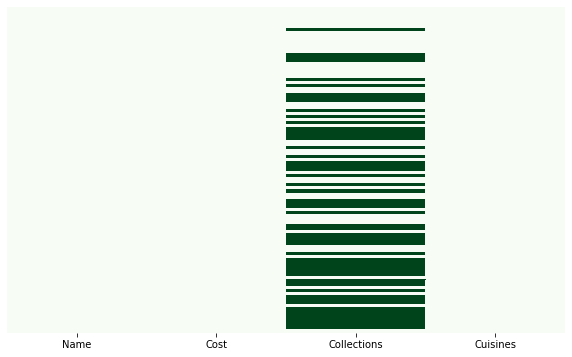

In [24]:
plt.figure(figsize = (10,6))

sns.heatmap(df.isna(), cbar= False , yticklabels = False, cmap = 'Greens')

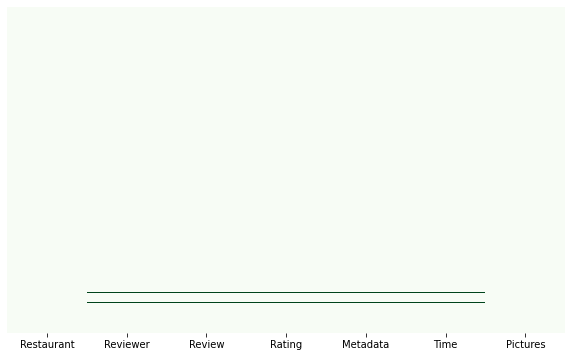

In [25]:
plt.figure(figsize=(10,6))
sns.heatmap(reviews.isna(),cbar = False, yticklabels= False, cmap = 'Greens')

In [26]:
df['Collections'].fillna('unknown', inplace = True)

In [27]:
df.isna().sum()

Name           0
Cost           0
Collections    0
Cuisines       0
dtype: int64

In [28]:
reviews.dropna(inplace=True)

In [29]:
reviews.isna().sum()

Restaurant    0
Reviewer      0
Review        0
Rating        0
Metadata      0
Time          0
Pictures      0
dtype: int64

In [30]:
# removing outliers

def remove_outliers(df1,column):
  plt.figure(figsize=(15,6))
  plt.subplot(1,2,1)
  plt.title("before removing outliers")
  sns.boxplot(df1[column])
  plt.subplot(1,2,2)
  sns.distplot(df1[column])
  df1= df1[((df1[column]- df1[column].mean())/df1[column].std()).abs()<3]
  df1= df1[((df1[column]-df1[column].mean())/df1[column].std()).abs()>-3]

  plt.figure(figsize = (15,6))
  plt.subplot(1,2,1)
  plt.title("After removing outliers")
  sns.boxplot(df1[column])
  plt.subplot(1,2,2)
  sns.distplot(df1[column])



In [31]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Cost,105.0,861.428571,510.14973,150.0,500.0,700.0,1200.0,2800.0


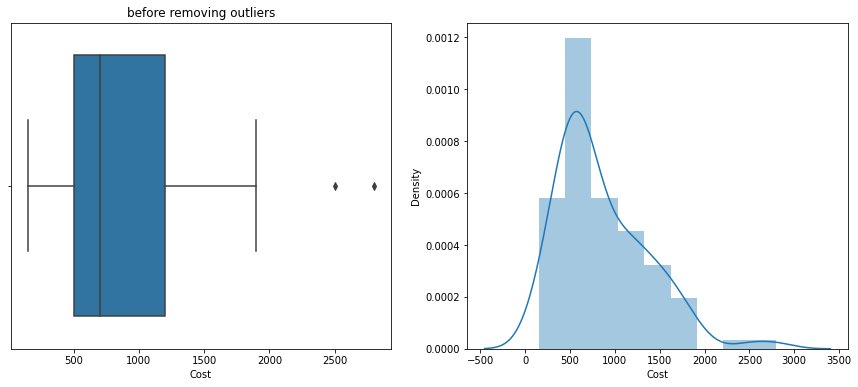

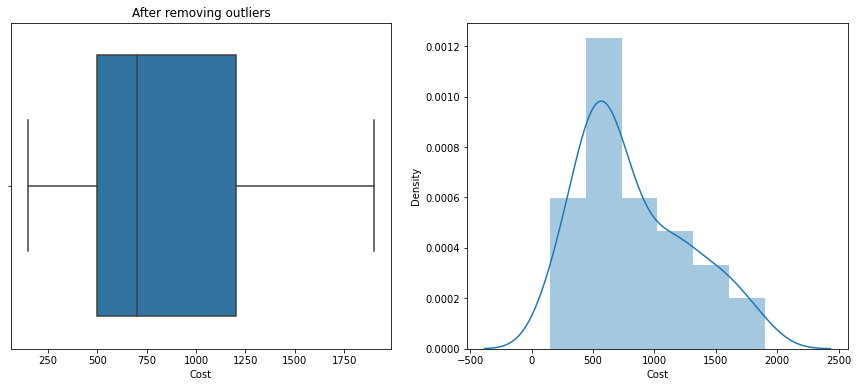

In [32]:
remove_outliers(df,'Cost')

In [33]:
reviews.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,9954.0,3.600261,1.483573,1.0,3.0,4.0,5.0,5.0
Pictures,9954.0,0.751959,2.575819,0.0,0.0,0.0,0.0,64.0


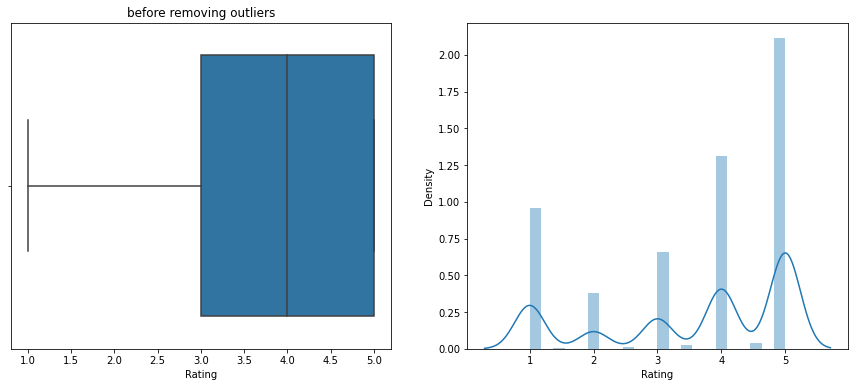

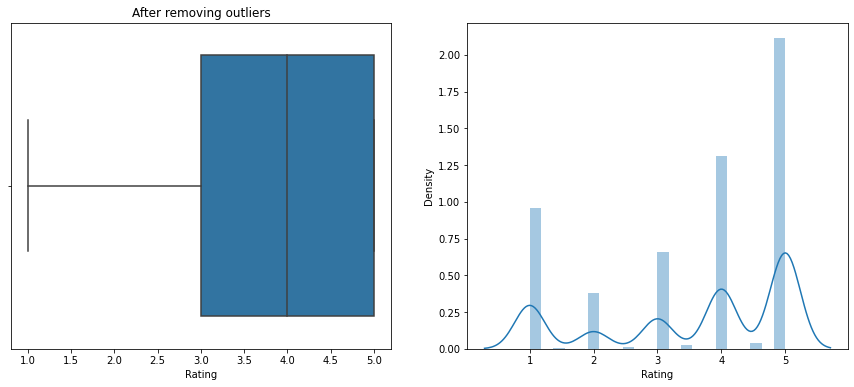

In [34]:
remove_outliers(reviews,'Rating')

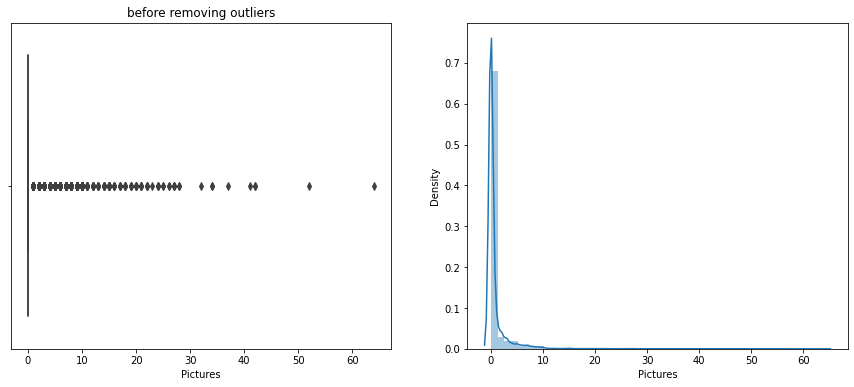

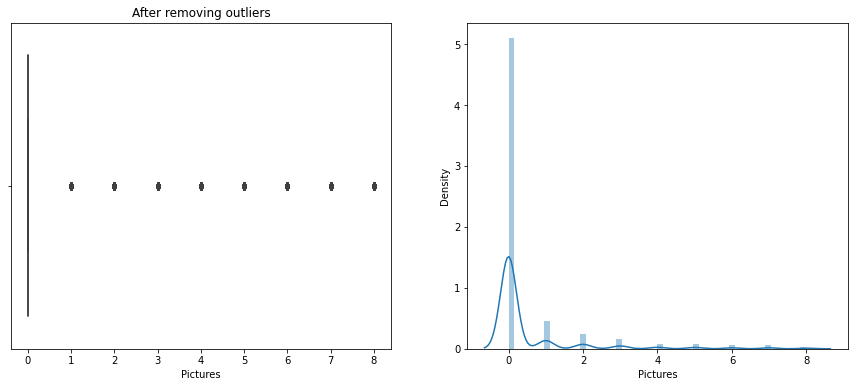

In [35]:
remove_outliers(reviews, 'Pictures')

We have string type varables present in Restuarant, collections and cuisines. So we try using the NLP on the neccessary columns for further analysis. Restuarant column has the names of all restuarants. So we focus on other 2 columns for further analysis.

# **(a) 'Collections' column**

# **1. To remove stopwords and punctuation**

In [36]:
# to remove stopwords 
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import nltk
nltk.download('stopwords')
# extracting the stopwords from nltk library
sw = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [37]:
# Defining a function to remove stopwords and punctuation

#remove stopwards
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

#remove punctuation
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)
     

In [38]:
df['Collections'] = df['Collections'].apply(remove_punctuation)

In [39]:

df['Collections'] = df['Collections'].apply(stopwords)

2. Count vectorizer

In [40]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# create a count vectorizer object
count_vectorizer = CountVectorizer()
# fit the count vectorizer using the text data
count_vectorizer.fit(df['Collections']) 
# collect the vocabulary items used in the vectorizer
dictionary = count_vectorizer.vocabulary_.items()
     

In [41]:
#list to store vocab and count
vocab = []
count = []
#iterate through each vocab and count append the value to designated list
for key, value in dictionary:
  vocab.append(key)
  count.append(value)
#store the count in pandas dataframe with vocab as index
vocab_bef_stem = pd.Series(count,  index = vocab)
#store the dataframe
vocab_bef_stem = vocab_bef_stem.sort_values(ascending = False)  

# **3. Stemming**

In [42]:
# create an object of stemming function
stemmer = SnowballStemmer("english")

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text) 

In [43]:
df['Collections'] = df['Collections'].apply(stemming)


# **4. tfid vectorizer**

In [44]:
# create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer()

# fit the vectorizer using the text data
tfid_vectorizer.fit(df['Collections'])   

# collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()

In [45]:
# Lists to store the vocab and counts
vocab = []
count = []
# Iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
# Store the count in panadas dataframe with vocab as index
vocab_after_stem = pd.Series(count, index=vocab)
# Sort the dataframe
vocab_after_stem = vocab_after_stem.sort_values(ascending=False)
     

# **5. Creating count of all words in collections as 'collections length'**

In [46]:
def length(text):   
  count = 0
  for i in range(len(text)):
    if text[i]==' ':
        count = count + 1
        
  return count+1

In [47]:
df['Collections_length'] = df['Collections'].apply(length)


In [48]:
df.head(5)

,Name,Cost,Collections,Cuisines,Collections_length
0,Beyond Flavours,800.0,food hygien rate restaur hyderabad corpor favo...,"Chinese, Continental, Kebab, European, South I...",15
1,Paradise,800.0,hyderabad hottest,"Biryani, North Indian, Chinese",2
2,Flechazo,1300.0,great buffet hyderabad hottest,"Asian, Mediterranean, North Indian, Desserts",4
3,Shah Ghouse Hotel & Restaurant,800.0,late night restaur,"Biryani, North Indian, Chinese, Seafood, Bever...",3
4,Over The Moon Brew Company,1200.0,best bar pub food hygien rate restaur hyderaba...,"Asian, Continental, North Indian, Chinese, Med...",13


# **(b) 'Cuisines' column**

In [49]:
#Cuisines has items of resturant which are seperated by comma. So there is nothing to clean in Cuisines. 
#So we consider the count of cuisines list
list_of_cuisins = df.Cuisines.str.split(', ')

df['Cuisines_list'] = pd.Series()

for i in range(len(df)):
  df['Cuisines_list'][i] = list_of_cuisins[i]


In [50]:
#creating a new column for the total number of cusines served by restaurants
df['Total Cuisines'] = df['Cuisines_list'].apply(lambda x : len(x))
df.drop(['Cuisines_list'],axis=1,inplace=True)
     

In [51]:
df.head(3)

,Name,Cost,Collections,Cuisines,Collections_length,Total Cuisines
0,Beyond Flavours,800.0,food hygien rate restaur hyderabad corpor favo...,"Chinese, Continental, Kebab, European, South I...",15,6
1,Paradise,800.0,hyderabad hottest,"Biryani, North Indian, Chinese",2,3
2,Flechazo,1300.0,great buffet hyderabad hottest,"Asian, Mediterranean, North Indian, Desserts",4,4


# **2. Reviews dataframe**

In [52]:
# the meta data column will be divided into 2 new columns since there are 2 types of info available
reviews['no_of_Reviews'],reviews['no_of_Followers']=reviews['Metadata'].str.split(',').str
reviews['no_of_Reviews'] = pd.to_numeric(reviews['no_of_Reviews'].str.split(' ').str[0])
reviews['no_of_Followers'] = pd.to_numeric(reviews['no_of_Followers'].str.split(' ').str[1])
     

In [53]:
# Converting newly created columns to float
reviews['no_of_Reviews'] = reviews['no_of_Reviews'].astype('float64')
reviews['no_of_Followers'] = reviews['no_of_Followers'].astype('float64')
     

In [54]:
# extracting the date and hour from the 'Time' column
reviews['Date'] = pd.DatetimeIndex(reviews['Time']).date
reviews['Hour'] = pd.DatetimeIndex(reviews['Time']).hour
     

In [55]:
#finding out the respected day,month and year
reviews['day'] = reviews['Date'].apply(lambda x: x.weekday())
reviews['month']=reviews['Date'].apply(lambda x: x.month)
reviews['year'] = reviews['Date'].apply(lambda x: x.year)


In [56]:
#Records of days and months were interms of numbers, so converting that to string type.

#weekdays
week_day={0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
reviews['day']=reviews['day'].map(week_day)
#months
month_dict={1:'Jan',2:'Feb',3:'March',4:'April',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
reviews['month']=reviews['month'].map(month_dict)

In [57]:
#Dropping the metadata and time
reviews = reviews.drop(['Metadata'], axis =1)
reviews = reviews.drop(['Time'], axis =1)
     

# **VIII. EDA**

# **1. Metadata Dataframe**

In [58]:
df.head(5)

,Name,Cost,Collections,Cuisines,Collections_length,Total Cuisines
0,Beyond Flavours,800.0,food hygien rate restaur hyderabad corpor favo...,"Chinese, Continental, Kebab, European, South I...",15,6
1,Paradise,800.0,hyderabad hottest,"Biryani, North Indian, Chinese",2,3
2,Flechazo,1300.0,great buffet hyderabad hottest,"Asian, Mediterranean, North Indian, Desserts",4,4
3,Shah Ghouse Hotel & Restaurant,800.0,late night restaur,"Biryani, North Indian, Chinese, Seafood, Bever...",3,5
4,Over The Moon Brew Company,1200.0,best bar pub food hygien rate restaur hyderaba...,"Asian, Continental, North Indian, Chinese, Med...",13,5


# **(i) Count of cuisines offered by restaurants**

In [59]:
list_of_cuisins = df.Cuisines.str.split(', ')

diff_cuisines = {} 
for names in list_of_cuisins: 
    for name in names:
        if (name in diff_cuisines):
            diff_cuisines[name]+=1
        else:  
            diff_cuisines[name]=1 
cuisines_df = pd.DataFrame(diff_cuisines.values(), diff_cuisines.keys(),columns = {'cuisines_counts'}).reset_index()
cuisines_df.sort_values(by = 'cuisines_counts',ascending = False,inplace = True) 
cuisines_df.rename(columns={'index':'cuisines_name', 'cuisines_name':'cuisines_counts'},inplace=True)
cuisines_df.head(10)

,cuisines_name,cuisines_counts
5,North Indian,61
0,Chinese,43
1,Continental,21
6,Biryani,16
18,Fast Food,15
7,Asian,15
20,Italian,14
9,Desserts,13
4,South Indian,9
29,Bakery,7


Text(0, 0.5, 'count of cuisines  in  all restaurants')

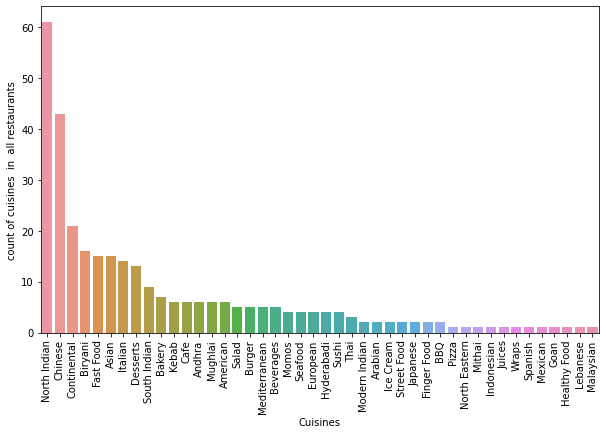

In [60]:
#diff_cuisines
fig = plt.figure(figsize=[10,6])
sns.barplot(data=cuisines_df, x='cuisines_name', y= 'cuisines_counts')
plt.xlabel('Cuisines')
plt.xticks(rotation=90)
plt.ylabel('count of cuisines  in  all restaurants')

We cna observe that 'North indian' is the Popular Cuisine which is offered by almost many resturants. And 'Malaysian' is the rare cuisine.

# (ii). Count of Collections offered by restaurants

In [61]:
list_of_collection = df.Collections.str.split(', ')
diff_coll = {} 
for names in list_of_collection: 
    for name in names:
        if (name in diff_coll):
            diff_coll[name]+=1
        else:  
            diff_coll[name]=1 
collections_df = pd.DataFrame(diff_coll.values(), diff_coll.keys(),columns = {'collection_counts'}).reset_index()
collections_df.sort_values(by = 'collection_counts',ascending = False,inplace = True) 
collections_df.rename(columns={'index':'collection_name', 'collection_name':'collection_counts'},inplace=True)
collections_df.head(10)
# since collections column has 51% null values.. we can drop it
     

,collection_name,collection_counts
7,unknown,54
6,food hygien rate restaur hyderabad,4
12,great buffet,2
40,new gold,2
1,hyderabad hottest,2
28,panasian delicaci,2
16,veggi friend,2
15,trend week,2
32,sunday brunch great breakfast function venu ra...,1
27,function venu region favorit,1


Text(0, 0.5, 'count of collections')

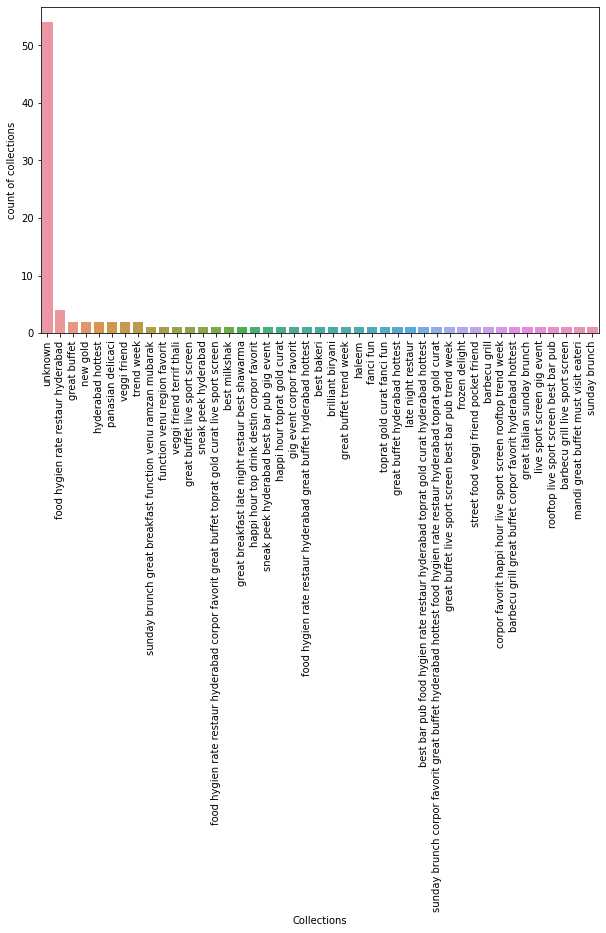

In [62]:
fig = plt.figure(figsize=[10,6])
sns.barplot(data=collections_df, x='collection_name', y= 'collection_counts')
plt.xlabel('Collections')
plt.xticks(rotation=90)
plt.ylabel('count of collections')

Collections are like a tagline whcih can be given to particular resturants. So we can get to know that the most used tagline for resturants are ' Hygine food' followed by 'Unkown'.

# **(iii). Total number of collections and cuisines wrt cost offered by each restaurant**

In [72]:
report = df.copy()

In [73]:
#taking only numeric columns to do the minmaxscaling
report_numeric = df[['Collections_length','Total Cuisines','Cost']]
#using standardization as both numeric columns are in different scale
#after words it will be easy for us to do the graphs
scaler = MinMaxScaler()
scaled = scaler.fit_transform(report_numeric)
#print(scaled)
report['collection_length_scaled'] = pd.Series(scaled[i][0] for i in range(len(scaled)))
report['cuisines_scaled'] = pd.Series(scaled[i][1] for i in range(len(scaled)))
report['cost_scaled'] = pd.Series(scaled[i][2] for i in range(len(scaled)))
#occupation_report = occupation_report.loc[1:21,:]

Text(0.5, 1.0, 'Restaurant sorted with number of cuisines wrt cost')

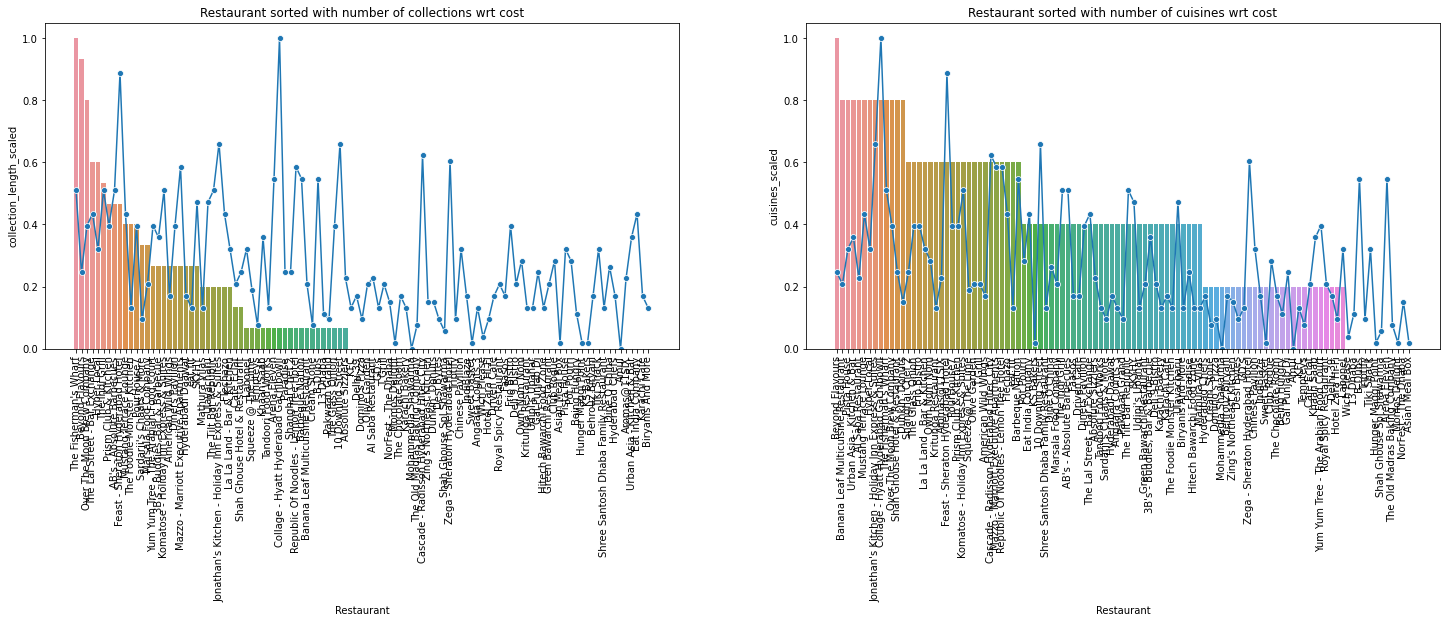

In [74]:
collection_df = report.sort_values(['Collections_length'],ascending=False)
cuisines_df = report.sort_values(['Total Cuisines'],ascending=False)

plt.figure(figsize=(25,6))

plt.subplot(1, 2, 1)
#plt.figure(figsize=(20,6))
plt.xticks(rotation=90)
sns.barplot(x='Restaurant',y='collection_length_scaled',data = collection_df)
sns.lineplot(x='Restaurant',y='cost_scaled',data= collection_df,marker='o')
plt.title('Restaurant sorted with number of collections wrt cost')

plt.subplot(1, 2, 2)
plt.xticks(rotation=90)
sns.barplot(x='Restaurant',y='cuisines_scaled',data = cuisines_df )
sns.lineplot(x='Restaurant',y='cost_scaled',data= cuisines_df,marker='o')
plt.title('Restaurant sorted with number of cuisines wrt cost')
#speaker_report

Here the line graph represents the cost. And collections count are represnted by colored bar graphs. We can see that they are not at all related.

The left graph is sorted wrt 'Collections count'.

The right graph is sorted wrt 'Cost'.

**(iv). Average Cost of each restaurant**

In [75]:
cost_at_restaurants = df.groupby(['Restaurant'])['Cost'].mean().sort_values(ascending=False).reset_index()
cost_at_restaurants.sort_values(by = 'Cost',ascending = False,inplace = True)

cost_at_restaurants.head(10)

,Restaurant,Cost
0,Collage - Hyatt Hyderabad Gachibowli,2800.0
1,Feast - Sheraton Hyderabad Hotel,2500.0
2,10 Downing Street,1900.0
3,Jonathan's Kitchen - Holiday Inn Express & Suites,1900.0
4,Cascade - Radisson Hyderabad Hitec City,1800.0
5,Zega - Sheraton Hyderabad Hotel,1750.0
6,Republic Of Noodles - Lemon Tree Hotel,1700.0
7,Mazzo - Marriott Executive Apartments,1700.0
8,Barbeque Nation,1600.0
9,Arena Eleven,1600.0


Text(0, 0.5, 'Cost')

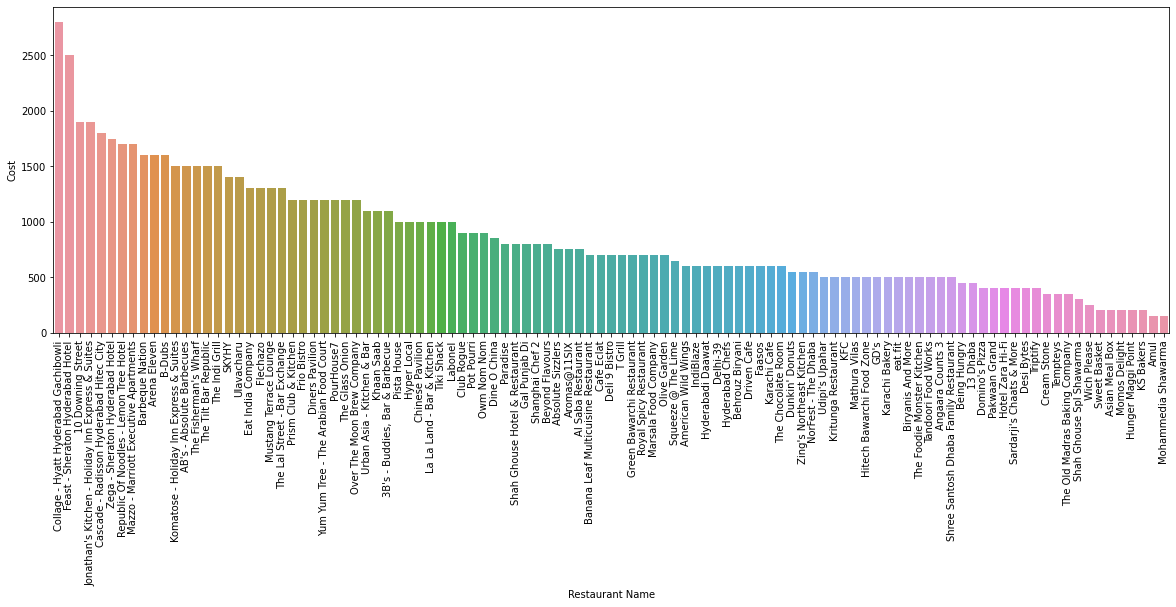

In [76]:
fig = plt.figure(figsize=[20,6])
sns.barplot(data=cost_at_restaurants, x='Restaurant', y= 'Cost')
plt.xlabel('Restaurant Name')
plt.xticks(rotation=90)
plt.ylabel('Cost')

Above graph represents the graph wrt the average cost of all resturants in sorted manner.

**(v). Best Restaurant with ratings and price**

In [77]:
top_restaurants_rating = reviews.groupby(['Restaurant'])['Rating'].mean().sort_values(ascending=False).reset_index()

restaurants_price_rating = top_restaurants_rating.merge(cost_at_restaurants,on='Restaurant',how='inner')
     

In [78]:
restaurants_price_rating.head(2)

,Restaurant,Rating,Cost
0,AB's - Absolute Barbecues,4.88,1500.0
1,B-Dubs,4.81,1600.0


In [79]:
#taking only numeric columns to do the minmaxscaling
report_numeric = restaurants_price_rating[['Rating','Cost']]
#using standardization as both numeric columns are in different scale
#after words it will be easy for us to do the graphs
scaler = MinMaxScaler()
scaled = scaler.fit_transform(report_numeric)
#print(scaled)
restaurants_price_rating['Rating_scaled'] = pd.Series(scaled[i][0] for i in range(len(scaled)))
restaurants_price_rating['Cost_scaled'] = pd.Series(scaled[i][1] for i in range(len(scaled)))
#occupation_report = occupation_report.loc[1:21,:]

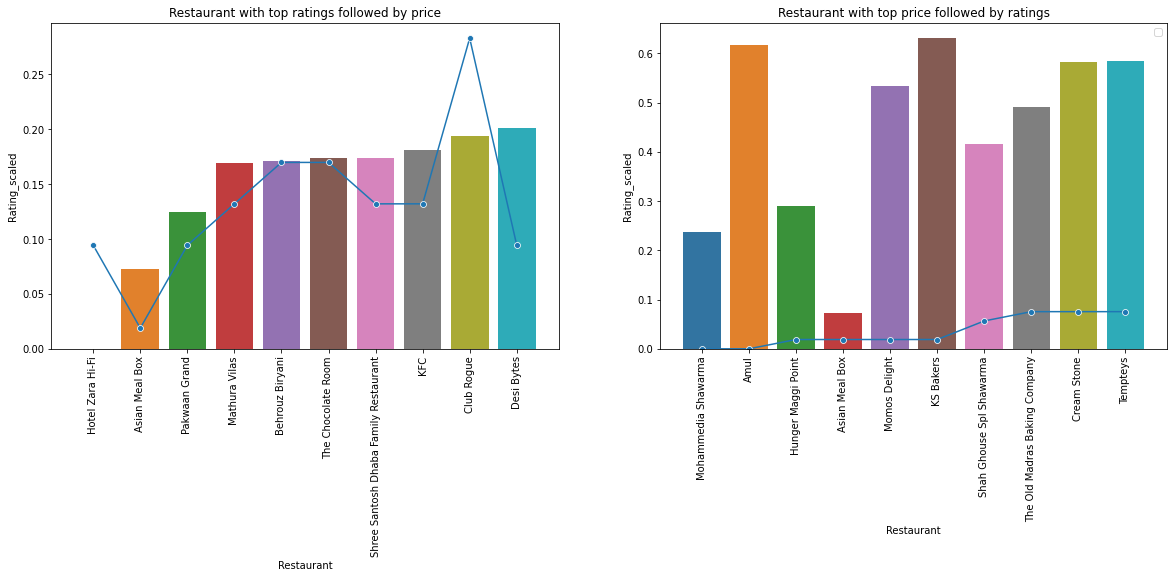

In [80]:
report_1 = restaurants_price_rating.sort_values('Rating').head(10)
report_2 = restaurants_price_rating.sort_values('Cost').head(10)

plt.figure(figsize=(20,6))

plt.subplot(1, 2, 1)
#plt.figure(figsize=(20,6))
plt.xticks(rotation=90)
sns.barplot(x='Restaurant',y='Rating_scaled',data = report_1 )
sns.lineplot(x='Restaurant',y='Cost_scaled',data= report_1,marker='o')
plt.title('Restaurant with top ratings followed by price')

plt.subplot(1, 2, 2)
plt.xticks(rotation=90)
sns.barplot(x='Restaurant',y='Rating_scaled',data = report_2 )
sns.lineplot(x='Restaurant',y='Cost_scaled',data= report_2,marker='o')
plt.title('Restaurant with top price followed by ratings')
plt.legend()
#speaker_report


Above graphs gives an idea about the best restuarants which has high rating along with the cost.The line chart represents the average price.

Left graph is sorted wrt price.

Right graph is sorted wrt average rating.

We can conclude that there exits some resdtuarants, even y having the more rating, the price is reasonable.